# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [14]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [15]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [16]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [17]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

When K = 1, the fraction of total variance explained is 16.40%
When K = 2, the fraction of total variance explained is 29.70%
When K = 3, the fraction of total variance explained is 39.90%
When K = 4, the fraction of total variance explained is 47.00%
When K = 5, the fraction of total variance explained is 50.80%
When K = 10, the fraction of total variance explained is 65.20%
When K = 20, the fraction of total variance explained is 80.90%
When K = 30, the fraction of total variance explained is 89.90%
When K = 40, the fraction of total variance explained is 95.10%
When K = 50, the fraction of total variance explained is 98.20%


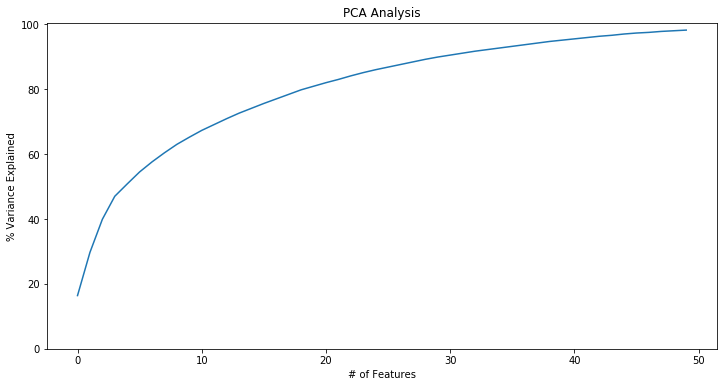

In [18]:
def P1():

### STUDENT START ###
    selected_K = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    pca = PCA(n_components=selected_K[-1])
    pca.fit(train_data)
    
    # Calculate cumulated sum of explained variance ratio
    variance = pca.explained_variance_ratio_
    total_EVR = np.round(np.cumsum(variance), 3)*100
    for k in selected_K:
        print("When K = %i, the fraction of total variance explained is %.2f%%" % (k, total_EVR[k-1]))
         
    plt.figure(figsize=(12,6))
    plt.ylabel('% Variance Explained')
    plt.xlabel('# of Features')
    plt.title('PCA Analysis')
    plt.ylim(0,100.5)
    plt.plot(total_EVR)
### STUDENT END ###

P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

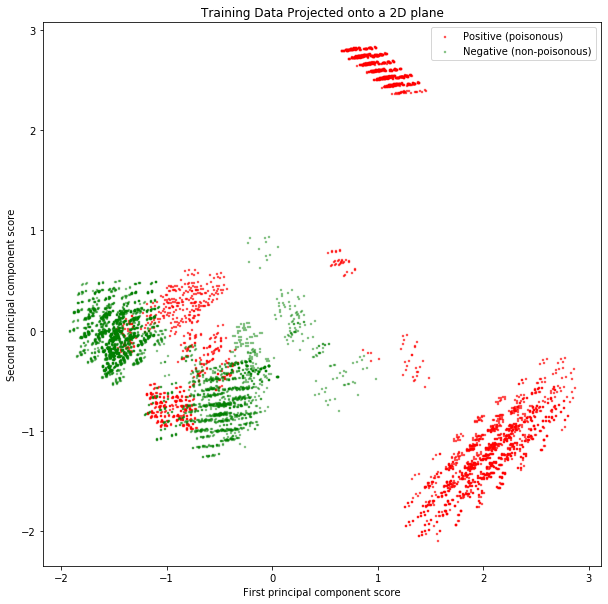

In [19]:
def P2():

### STUDENT START ###
    # reduce to 2 dimensions using PCA
    pca = PCA(n_components = 2).fit(X)
    pca_2d = pca.transform(train_data)

    plt.figure(figsize = (10,10))
    # build scatter plot
    positive = plt.scatter(pca_2d[:,0][train_labels==1],pca_2d[:,1][train_labels==1],
                           facecolor='r',marker="s",alpha=.6,s=8,lw=0.3)
    negative = plt.scatter(pca_2d[:,0][train_labels==0],pca_2d[:,1][train_labels==0],
                           facecolor='g',marker="s",alpha=.4,s=8,lw=0.3)
    # add legend
    plt.legend((positive,negative),
           ('Positive (poisonous)', 'Negative (non-poisonous)'),
           scatterpoints=1, loc='upper right',
           ncol=1, fontsize=10)
    plt.xlabel("First principal component score")
    plt.ylabel('Second principal component score')
    plt.title("Training Data Projected onto a 2D plane")
    plt.show()
### STUDENT END ###

P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

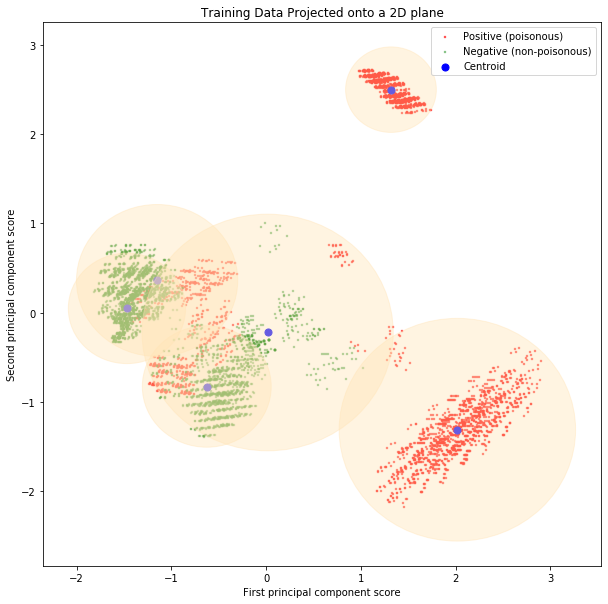

In [20]:
def P3():

### STUDENT START ###
    pca = PCA(n_components = 2).fit(train_data)
    pca_2d = pca.transform(train_data)
    
    # fit a k-means cluster model with 4 clusters using transformed data
    n_clusters = 6
    kmeans = KMeans(n_clusters = n_clusters, init='k-means++', max_iter=100, n_init=1, random_state=0)
    kmeans.fit(pca_2d)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    
    # plot data with actual labels
    plt.figure(figsize = (10,10))
    ax=plt.gca()
    positive = ax.scatter(pca_2d[:,0][train_labels==1],pca_2d[:,1][train_labels==1],
                           facecolor='r',marker="s",alpha=.6,s=8,lw=0.3)
    negative = ax.scatter(pca_2d[:,0][train_labels==0],pca_2d[:,1][train_labels==0],
                           facecolor='g',marker="s",alpha=.4,s=8,lw=0.3)
    
    for i in range(n_clusters):
        # find centroid
        centroid = cluster_centers[i,:]
        # maximum distance
        max_dist = max(np.linalg.norm(pca_2d[kmeans.labels_==i]-np.transpose(centroid.reshape(-1,1)), axis=1))
        # find circle that goes through the cluster's example that is most distant from the centroid
        circle = plt.Circle(centroid, max_dist, color='moccasin', alpha = 0.4)
        ax.add_patch(circle)
        centroid_pt = ax.scatter(centroid[0], centroid[1], facecolor='b', marker='o', s=50)
    # add legend
    plt.legend((positive, negative, centroid_pt),
           ('Positive (poisonous)', 'Negative (non-poisonous)', 'Centroid'),
           scatterpoints=1, loc='upper right', ncol=1, fontsize=10)
    plt.xlabel("First principal component score")
    plt.ylabel('Second principal component score')
    plt.title("Training Data Projected onto a 2D plane")
    plt.show()
### STUDENT END ###

P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

C:\Users\Ambe Chen\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Log scale: values of z <= 0 have been masked
C:\Users\Ambe Chen\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Log scale: values of z <= 0 have been masked
C:\Users\Ambe Chen\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Log scale: values of z <= 0 have been masked
C:\Users\Ambe Chen\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Log scale: values of z <= 0 have been masked
C:\Users\Ambe Chen\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Log scale: values of z <= 0 have been masked
C:\Users\Ambe Chen\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Log scale: values of z <= 0 have been masked
C:\Users\Ambe Chen\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Log scale: values of z <= 0 have been masked
C:\Users\Ambe Chen\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarnin

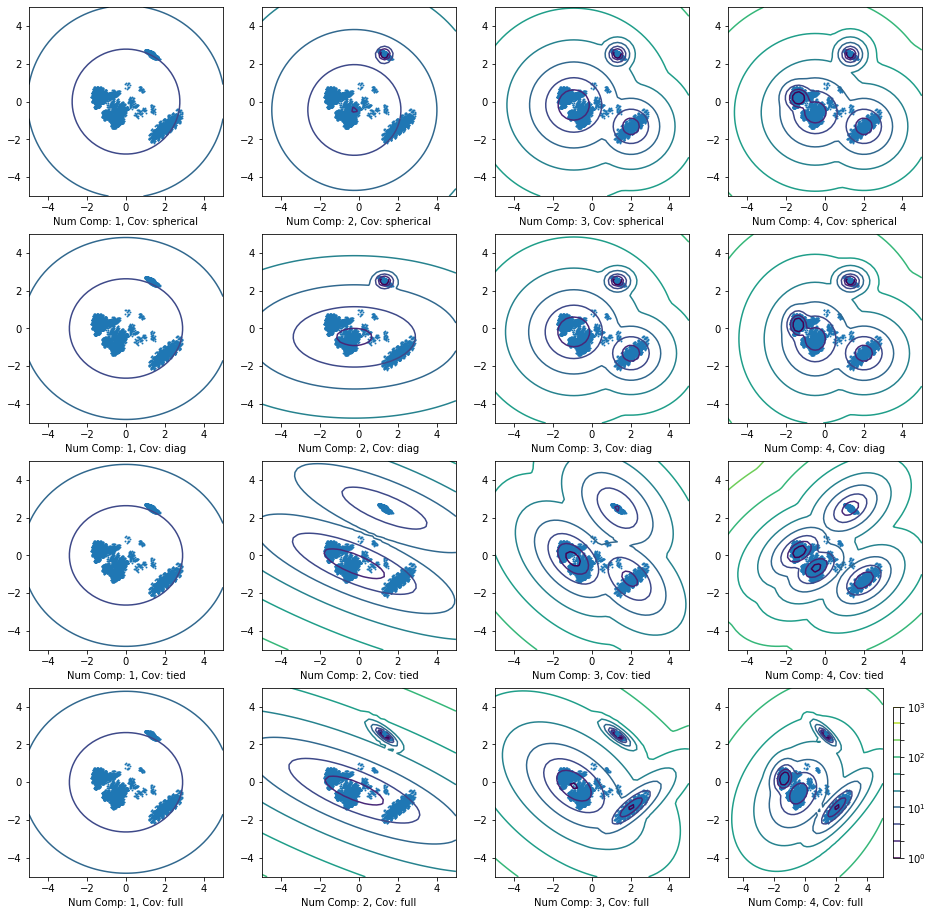

In [21]:
def P4():

### STUDENT START ###
    pca = PCA(n_components = 2).fit(train_data)
    pca_2d = pca.transform(train_data)
    
    n_range = range(1,5)
    cov_types = ['spherical', 'diag', 'tied', 'full']
    plt.figure(figsize=(16, 16))
    plt.title('Negative log-likelihood predicted by a GMM')
    for i, cov_type in enumerate(cov_types):
        for n in n_range:
            gmm = GaussianMixture(n_components=n, covariance_type=cov_type, random_state=12345)
            gmm.fit(pca_2d)

            # display predicted scores by the model as a contour plot
            x = np.linspace(-5., 5.)
            y = np.linspace(-5., 5.)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gmm.score_samples(XX)
            Z = Z.reshape(X.shape)
            
            p = plt.subplot(4, 4, i*4+n)
            CS = p.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
            p.scatter(pca_2d[:,0], pca_2d[:,1], .8)
            p.set_xlabel("Num Comp: " + str(n) + ", Cov: " + cov_type)
            
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    plt.show()
### STUDENT END ###

P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [22]:
def P5():

### STUDENT START ###
    # transform both training and test data
    pca = PCA(n_components = 2).fit(train_data)
    pca_2d_train = pca.transform(train_data)
    pca_2d_test = pca.transform(test_data)
    
    # Poisonous model
    gmm_positive = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    gmm_positive.fit(pca_2d_train[train_labels == 1])
    prob_positive = gmm_positive.score_samples(pca_2d_test)
    
    # Non-poisonous model
    gmm_negative = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    gmm_negative.fit(pca_2d_train[train_labels == 0])
    prob_negative = gmm_negative.score_samples(pca_2d_test)
    
    # Label 1 if the probability of being positive is greater than the probability of being negative
    # Otherwise label 0
    pred_labels = np.where(prob_positive > prob_negative, 1, 0)
    
    accuracy = float(np.sum(pred_labels == test_labels))/ test_labels.shape[0]
    print("The accuracy of the predictions on the test data: %.2f%%" % (accuracy*100))
### STUDENT END ###

P5()

The accuracy of the predictions on the test data: 95.02%


### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For spherical, diag, and full covariance types:
  * number of parameters = (number of parameters per gmm component * number of gmm components - 1) * number of classes
  * number of parameters per gmm component includes all the means plus all the non-zero, non-duplicated values in the covariance matrix plus the mixing weight
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter


* To calculate the number of parameters for tied covariance type:
  * number of parameters = (number of parameters per class - 1) * number of classes
  * number of parameters per class includes all the means and mixing weights for all the gmm components plus all the non-zero, non-duplicated values in the one shared covariance matrix
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter

In [23]:
def P6():

### STUDENT START ###
    param_limit = 50
    all_mod_details = []
    all_mod_accuracies = []
    cov_types = ['spherical', 'diag', 'tied', 'full']
    PCA_n_components = range(2,26)
    GMM_n_components = range(2,26)
    for cov_name in cov_types:
        for PCA_n in PCA_n_components:
            for GMM_n in GMM_n_components:
                 
                # Reduce the dimensions of both training and test data to n
                pca = PCA(n_components = PCA_n).fit(train_data)
                pca_train_data = pca.transform(train_data)
                pca_test_data = pca.transform(test_data)
                
                gmm_positive = GaussianMixture(n_components=GMM_n, covariance_type=cov_name, random_state=12345)
                gmm_positive.fit(pca_train_data[train_labels == 1])
                prob_positive = gmm_positive.score_samples(pca_test_data)

                gmm_negative = GaussianMixture(n_components=GMM_n, covariance_type=cov_name, random_state=12345)
                gmm_negative.fit(pca_train_data[train_labels == 0])
                prob_negative = gmm_negative.score_samples(pca_test_data)
                
                #num of means = pca_n * GMM_n
                n_means = gmm_positive.means_.shape[0] * gmm_positive.means_.shape[1]
                
                #Calculate the number of non-zero, non-duplicated values in the covariance matrix
                if cov_name == 'tied':
                    n_cov_val = int(PCA_n * (PCA_n + 1) / 2)
                elif cov_name == 'full':
                    n_cov_val = int(PCA_n * (PCA_n + 1) / 2 * GMM_n)
                elif cov_name == 'spherical':
                    n_cov_val = GMM_n
                else:
                    n_cov_val = PCA_n * GMM_n
                
                n_params = (n_means + n_cov_val) * 2
                
                if n_params <= 50:
                    pred_labels = np.where(prob_positive > prob_negative, 1, 0)
                    accuracy = float(np.sum(pred_labels == test_labels))/ test_labels.shape[0]
                    # PCA, GMM, covariance type name, num of params, accuracy
                    details = [PCA_n, GMM_n, cov_name, n_params, round(accuracy,5)]
                    all_mod_details.append(details)
                    all_mod_accuracies.append(accuracy)
    #sort by accuracy
    indices = np.argsort(all_mod_accuracies)[::-1]
    # print the matrix
    row_format = "{:>15}" * (6)
    print(row_format.format(*["Rank", "PCA", "GMM", "Cov type", "Num of params", "Accuracy"]))
    for i, ind in enumerate(indices):
        print(row_format.format(i+1, *all_mod_details[ind]))
### STUDENT END ###

P6()

           Rank            PCA            GMM       Cov type  Num of params       Accuracy
              1              7              3      spherical             48        0.97331
              2              4              3           tied             44        0.96975
              3              5              4      spherical             48        0.96886
              4              6              3      spherical             42        0.96797
              5              5              3      spherical             36        0.96619
              6              3              4      spherical             32        0.95907
              7              5              2           tied             50        0.95819
              8              2             11           tied             50        0.95819
              9              4              5      spherical             50         0.9573
             10              2              5           full             50         0.9573